In [1]:
# import and init libraries

from pandas import DataFrame, read_csv

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

# avoiding type 3 fonts: http://phyletica.org/matplotlib-fonts/
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# enable inline plotting
%matplotlib inline

sns.set(style="ticks")

In [2]:
CB_RRDP  = 'imc20/data/rrdp.houraddr.cb.rg.net.count'
CB_RSYNC = 'imc20/data/rsync.houraddr.cb.rg.net.count'
CC_RRDP  = 'imc20/data/rrdp.houraddr.cc.rg.net.count'
CC_RSYNC = 'imc20/data/rsync.houraddr.cc.rg.net.count'

cb_rrdp  = pd.read_csv(CB_RRDP,
                delim_whitespace=True,
                names=['Date', 'RRDP'],
                parse_dates=['Date'],
                index_col=0)
cb_rsync = pd.read_csv(CB_RSYNC,
                delim_whitespace=True,
                names=['Date', 'rsync'],
                parse_dates=['Date'],
                index_col=0)
cc_rrdp = pd.read_csv(CC_RRDP,
                delim_whitespace=True,
                names=['Date', 'RRDP'],
                parse_dates=['Date'],
                index_col=0)
cc_rsync = pd.read_csv(CC_RSYNC,
                delim_whitespace=True,
                names=['Date', 'rsync'],
                parse_dates=['Date'],
                index_col=0)

In [3]:
# Research PP-b

df = pd.concat([cb_rrdp,cb_rsync], axis=1, sort=False)
# reindex, fill missing values with -1 (usually you can keep it at nan)
df.index = pd.to_datetime(df.index) # make sure you have timestamps
df = df.reindex( pd.date_range("2020-04-24T23", "2020-05-18T06", freq="H") )
# df = df.fillna(value=-1)

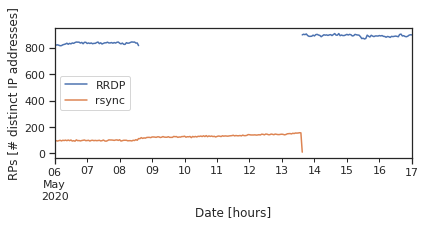

In [4]:
ax = df.plot(figsize=(6.4, 2.4))

ax.set_xlim(pd.Timestamp('2020-05-06'), pd.Timestamp('2020-05-17'))

ax.set_ylabel('RPs [# distinct IP addresses]')
ax.set_xlabel('Date [hours]')
ax.legend(loc='center left')

# save and explicitly close figure
fig = ax.get_figure()
fig.savefig("imc20/rg-experiment-b.pdf", bbox_inches='tight') # tight removes whitespace borders
plt.show()
plt.close(fig)

In [5]:
# Research PP-c

df = pd.concat([cc_rrdp,cc_rsync], axis=1, sort=False)
# reindex, fill missing values with -1 (usually you can keep it at nan)
df.index = pd.to_datetime(df.index) # make sure you have timestamps
df = df.reindex( pd.date_range("2020-04-24T23", "2020-05-18T06", freq="H") )
# df = df.fillna(value=-1)

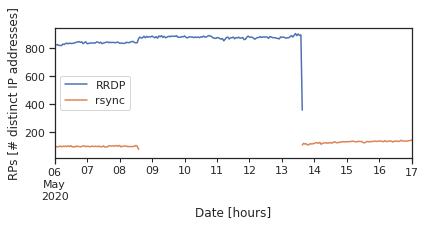

In [6]:
ax = df.plot(figsize=(6.4, 2.4))

ax.set_xlim(pd.Timestamp('2020-05-06'), pd.Timestamp('2020-05-17'))

ax.set_ylabel('RPs [# distinct IP addresses]')
ax.set_xlabel('Date [hours]')
ax.legend(loc='center left')

# save and explicitly close figure
fig = ax.get_figure()
fig.savefig("imc20/rg-experiment-c.pdf", bbox_inches='tight') # tight removes whitespace borders
plt.show()
plt.close(fig)

In [7]:
## Research PP-b/PP-c combined

df = pd.concat([cb_rrdp,cb_rsync,cc_rrdp,cc_rsync], axis=1, sort=False)

# reindex, fill missing values with -1 (usually you can keep it at nan)
df.index = pd.to_datetime(df.index) # make sure you have timestamps
df = df.reindex( pd.date_range("2020-04-24T23", "2020-05-18T06", freq="H") )
# df = df.fillna(value=-1)

In [8]:
## OLD
#fig, axes = plt.subplots(2, 1)

# Set common labels
#fig.text(0.5, 0.04, 'Date', ha='center', va='center')
#fig.text(0.02, 0.5, 'Unique RP IP addresses/hour', ha='center', va='center', rotation='vertical')

#df.plot(ax=axes[0], y='PP-b RRDP', color='orange')
#df.plot(ax=axes[0], y='PP-b rsync', color='green')
#df.plot(ax=axes[1], y='PP-c RRDP', color='red')
#df.plot(ax=axes[1], y='PP-c rsync', color='blue')

#axes[0].set_xlim(pd.Timestamp('2020-05-06'), pd.Timestamp('2020-05-17'))
#axes[1].set_xlim(pd.Timestamp('2020-05-06'), pd.Timestamp('2020-05-17'))
#axes[0].get_xaxis().set_visible(False)
#axes[1].legend(loc='center left')

#fig.savefig("imc20/rg-experiment.pdf", bbox_inches='tight') # tight removes whitespace borders
#plt.show()
#plt.close(fig)